# Exercises

These exercises are a mix of Python and pandas/EDA practice. Most should be no more than a few lines of code! 

In [2]:
# here is a Python list:

a = [1, 2, 3, 4, 5, 6]

# get a list containing the last 3 elements of a
a1 = a[-3:]
print(a1)
# reverse the list
a2 = list(reversed(a))
print(a2)
# get a list where each entry in a is squared (so the new list is [1, 4, 9, 16, 25, 36])
a3 = [x**2 for x in a]
print(a3)

[4, 5, 6]
[6, 5, 4, 3, 2, 1]
[1, 4, 9, 16, 25, 36]


In [3]:
import numpy as np
# create a numpy array from this list
b = np.array(a) # change this
print(b)

[1 2 3 4 5 6]


In [6]:
# find the mean of b
m = b.mean()
print(m)

3.5


In [21]:
# get a list where each entry in b is squared (so the new numpy array is [1, 4, 9, 16, 25, 36])
# use a different (numpy-specific) approach
b0 = np.square(b)
print(b0)

[ 1  4  9 16 25 36]


In [27]:
# change b from a length-6 list to a 2x3 matrix
b = b.reshape(2,3)
print(b)

[[1 2 3]
 [4 5 6]]


In [28]:
# find the mean value of each row
b.mean(axis=1)

array([2., 5.])

In [29]:
# find the mean value of each column
b.mean(axis=0)

array([2.5, 3.5, 4.5])

In [30]:
# find the third column of b
b[:,2]

array([3, 6])

In [4]:
# load in the "starbucks_clean.csv" dataset
import pandas as pd
df = pd.read_csv('../data/starbucks_clean.csv')

In [5]:
# this is nutritional info for starbucks items
# let's see if we can answer some questions

# what is the average # calories across all items?
df['calories'].mean()

193.87190082644628

In [6]:
# how many different categories of beverages are there?
df['beverage'].nunique()

33

In [7]:
# what is the average # calories for each beverage category?
df.groupby('beverage_category')['calories'].mean()

beverage_category
classicespressodrinks            140.172414
coffee                             4.250000
frappuccinoblendedcoffee         276.944444
frappuccinoblendedcrme           233.076923
frappuccinolightblendedcoffee    162.500000
shakenicedbeverages              114.444444
signatureespressodrinks          250.000000
smoothies                        282.222222
tazoteadrinks                    177.307692
Name: calories, dtype: float64

In [14]:
# what beverage preparation includes the most sugar on average?
df.groupby('beverage_prep')['sugars'].mean().idxmax()

'Whole Milk'

In [15]:
# what is the average % daily value calcium content for each beverage?
df.groupby('beverage')['calcium'].mean()

beverage
bananachocolatesmoothie                      20.000000
brewedcoffee                                  0.500000
caffamericano                                 1.500000
cafflatte                                    35.000000
caffmochawithoutwhippedcream                 30.000000
cappuccino                                   22.500000
caramel                                      11.000000
caramelapplespicewithoutwhippedcream          0.000000
caramelmacchiato                             28.333333
caramelwithoutwhippedcream                   12.000000
coffee                                       12.333333
espresso                                      0.000000
hotchocolatewithoutwhippedcream              35.000000
icedbrewedcoffeewithclassicsyrup              0.000000
icedbrewedcoffeewithmilkclassicsyrup          8.000000
javachip                                     11.666667
javachipwithoutwhippedcream                  12.555556
mocha                                        11.000000
m

In [24]:
# It's bulking season. What drink should Naitian get so that he maximizes protein but minimizes calories?
# (you can use more than one line for this one)
# there are multiple valid approaches you can take for this (with different answers)
# I know that you want more calories for bulking season but whatever this is MDST, not Michigan Muscle Club okay
bound = df['calories'].mean()
df.iloc[df.loc[df['calories'] < bound, 'protein'].idxmax()]
# most protein under avg calories

Unnamed: 0                                13
beverage_category      classicespressodrinks
beverage                           cafflatte
beverage_prep              Venti Nonfat Milk
calories                                 170
total fat                                0.4
trans fat                                0.3
saturated fat                            0.0
 sodium                                   10
total carbohydrates                      190
cholesterol                               25
dietary fibre                              0
sugars                                    23
protein                                 16.0
vitamin a                                 30
vitamin c                                  0
calcium                                   50
iron                                     0.0
caffeine                                 150
Name: 13, dtype: object

<AxesSubplot:ylabel='Frequency'>

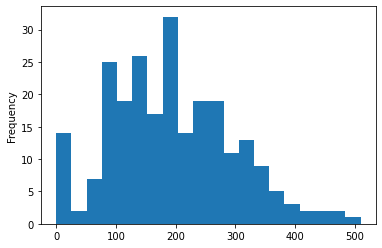

In [27]:
# plot the distribution of the number of calories in drinks using matplotlib
import matplotlib as plt
df['calories'].plot.hist(bins=20)

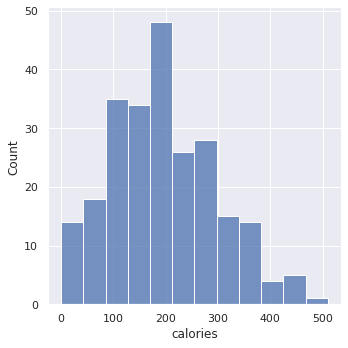

In [29]:
# plot the same distribution using seaborn. what about a density plot instead?
import seaborn as sns
sns.set()
sns.displot(data=df, x='calories')

<AxesSubplot:xlabel='calories', ylabel='total fat'>

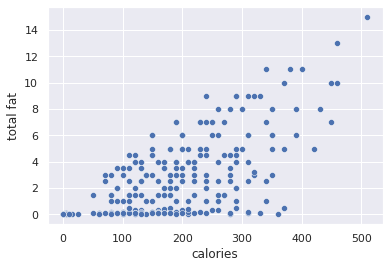

In [32]:
# plot calories against total fat using seaborn
sns.scatterplot(data=df, x='calories', y='total fat')

<AxesSubplot:xlabel='calories', ylabel='Count'>

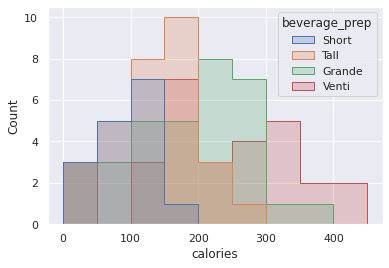

In [62]:
# plot the distribution of calories in Short, Tall, Grande, and Venti drinks
# (you can use multiple lines for this)
# twist: you should also include the Nonfat Milk drinks that also have an associated size.

# you can decide how you want to visualize this. Colors? Small multiples? Density vs histogram?
# the starbucks is your oyster.

# get sizes
sizes = ['Short', 'Tall', 'Grande', 'Venti']
df['beverage_prep'] = df['beverage_prep'].apply(lambda x: x.split()[0])
new_df = df[df['beverage_prep'].isin(sizes)]
sns.histplot(new_df, x='calories', hue='beverage_prep', element="step")